### <font color='darkblue'>Look Ma, no loops! (Introducing NumPy)</font>

[NymPy](https://numpy.org/), which stands for *Numerical Python*, is a Python module that implements arrays and allows "vector" operations on arrays  without explicit loops. 

NumPy is the 2nd of the four modules most frequently used in scientific computing with Python: [Matplotlib](https://matplotlib.org), [NymPy](https://numpy.org/), [SciPy](https://scipy.org/), and [Pandas](https://pandas.pydata.org/). 

To start using NumPy we do: 

In [ ]:
import numpy

Although a much more common convention is to create a shorter *alias* name for it

In [ ]:
import numpy as np

After this for all effective purposes <tt>np</tt> stands for <tt>numpy</tt> in your code. 

We saw that practical calculations (even simple ones), often involve loops to automate repetitive tasks. Loops are very useful in programming. 

However, in Python they can also be very slow when the number of loop cycles get large. This is because Python interpreter reads in Python code line by line, so it does the interpreting of the code lines within the loop at each loop cycle. This results in quite an overhead. 

***A note.*** Using a module introduces a "dependency" of your code on that module. If, for example, a module is not part of standard Python distributions, user of your code will need to install the module first (it's usually easy but still..) If module changes, your code may need to change to reflect these changes. 

However, NumPy is now so widely used that it usually comes as part of most, but the most basic Python distributions. Its functions are also quite stable as it's been in use for well over a decade. NumPy dependency is relatively safe, therefore, and in fact it's difficult to write a computationally efficient code for scientific analyses without using NumPy. 

In [ ]:
# zeros method creates array with specified dimensions filled with zeroes 
# (in this case 3d array of dimensions 2 x 3 x 4)
x = np.zeros((2,3,4)) 
# ones methods create NumPy array with specified dimensions filled with 1s
y = np.ones((2,3,4))
print(x.shape) # shape method returns dimensions of array
print(x[0]) # addressing to only subset of dimensions is allowed for numpy arrays
print(x[0,2]) # so indexing like this without error only indicates that array has >= 2 dimensions
print(y[0,2])

(2, 3, 4)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[0. 0. 0. 0.]
[1. 1. 1. 1.]


### <font color='darkblue'>Look Ma, no loops! (Introducing NumPy)</font>

Previously, we've been generating list of uniformly distributed random numbers for various practical needs

In [ ]:
# we generated a lists of nr random numbers like this (or with append)
# which can take a non-negligible amount of time for large nr
from random import random 

def get_n_random(nr): 
    '''
    Create a list of size nr filled with nr uniformly distributed numbers in [0,1]
    '''
    xl = []
    for i in range(nr):
        xl.append(random()) 
    return xl 

nr = 10000000
%timeit get_n_random(nr)

1 loop, best of 5: 1.62 s per loop


%timeit is one of the Jupyter's "magic" commands that times the code in the line that follows it.

The same can be done with NumPy's function <tt>np.random.uniform</tt> about 10 times faster and in a single line of code. 

In [ ]:
# produce nr uniformly distributed random numbers using a numpy function

%timeit xnp = np.random.uniform(size = nr)

If you then realize that you need to square elements of this list, you need to do this in another loop: 

In [ ]:
xsql = []
for xi in xl: 
    xsql.append(xi * xi)
    
# while with NumPy array this is simply
xsqnp = xnp**2 

In [ ]:
lst = [1, 2.0, '3', 4, '5']
arr = np.array([1, 2.0, '3', 4, '5'])
app
# scan through list or array elements
print(lst[::])
print(arr[::]) 

[1, 2.0, '3', 4, '5']
['1' '2.0' '3' '4' '5']


You can see two differences: NumPy array is printed without commas. This is because commas delineate list elements, and NumPy arrays are *not* lists, even though they often can be handled in a similar way. 

The second difference is that the initialization of the list and array above is similar but output is *very* different. NymPy array printed all elements as strings, even though only two elements were initialized as strings. 

This is because **_NumPy arrays do not allow mixing types_**. If types are mixed at initialization, all elements are made of one type (if floats and integers are mixed with strings, all elements will become strings; if integers are mixed with floats, all elements will be made float). 
 
 
Once a number array is created with elements of a given type, we can change an element to another type.

In [ ]:
x = np.array(list(range(5)))
print(x)
y = x
y[-1] = 'four'
print(x) # here we will see that x changed even though we did not explicitly change it

[0 1 2 3 4]


ValueError: ignored

What worked for lists does not work for NumPy arrays. We cannot assign an element a string, once NumPy array was created with integers as elements. 

### <font color='darkblue'>In most situations, NumPy arrays can be handled the same way as lists.</font> 

For example, the following section is taken straight from hw02_background_info description of slicing operations for lists, but now applied to NumPy arrays. 

### <font color='darkblue'>Slicing operations on NumPy arrays</font> 


In [ ]:
arr = np.array([1, 2.0, 3, 4, 5])

# scan through list or array elements in reverse order
print(arr[::-1]) 

[5. 4. 3. 2. 1.]


In [ ]:
arr[::-1] # scan through elements in reverse order 

array([5., 4., 3., 2., 1.])

In [ ]:
arr[::2], arr[::-2] # scan with step of 2, scan with step 2 in reverse order

(array([1., 3., 5.]), array([5., 3., 1.]))

In [ ]:
arr[2:] # select starting from the 3rd element

array(['3', '4', '5'], dtype='<U32')

In [ ]:
arr[:-2] # select starting from the 3rd to last element

array(['1', '2.0', '3'], dtype='<U32')

Lists can be changed at any point (they are "mutable" in programming jargon):

In [ ]:
arr[4] = 'five'
arr

array(['1', '2.0', '3', '4', 'five'], dtype='<U32')

We can generate a list of consecutive numbers from n1 to n2-1 with some step s as follows

In [ ]:
n1, n2, s = 0, 10, 1
consecutive_numbers = np.arange(n2) # in this case n1 and s can be ommitted as 0 and 1 are their default values
print(consecutive_numbers)

n1, n2, s = 10, 100, 10
consecutive_numbers = np.arange(n1, n2, s)
print(consecutive_numbers)

[0 1 2 3 4 5 6 7 8 9]
[10 20 30 40 50 60 70 80 90]


### <font color='darkblue'>Array assignment and copying NumPy arrays

You may recall that if one list is assigned to another list, both list names are now referencing the same location in memory, so if elements in one list are changed, they will change in the other. For example: 

In [ ]:
x = list(range(5))
print(x)
y = x
y[-1] = 40
print(x) # here we will see that x changed even though we did not explicitly change it

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 40]


This is also true for NumPy arrays: 

In [ ]:
x = np.array(list(range(5)))
print(x)
y = x
y[-1] = 40
print(x) # here we will see that x changed even though we did not explicitly change it

[0 1 2 3 4]
[ 0  1  2  3 40]


To avoid this we can do a "deep" copy, which for lists looks like

In [ ]:
y = x[:]

and for NumPy arrays is

In [ ]:
y = np.copy(x)

In [ ]:
x = np.array(list(range(5)))
print(x)
y = np.copy(x)
y[-1] = 40
print(x) # here we will see that x changed even though we did not explicitly change it

[0 1 2 3 4]
[0 1 2 3 4]


**Note** that using a slicing operation on a list always creates a copy of this list in memory. Likewise, we can use slicing to copy only a subset of list elements: 

In [ ]:
z = x[1:3]
print(z)

[1, 2]


### <font color='darkblue'>Matplotlib works with NumPy arrays similarly to lists</font> 

in most cases...

In [ ]:
from matplotlib import pylab as plt

def plot_hist(x, bins = 'auto', figsize = (6,6), density = True, xlabel = 'x'):
    plt.figure(figsize = figsize) # define figure and its dimensions
    plt.xlabel(xlabel) # x-axis label
    plt.ylabel('histogram') # y-axis label
    plt.hist(x, density = density, color = 'slateblue', bins = bins) # produce histogram of xs values
    plt.show() # show the entire plot

In addition, NumPy module has all [frequently used math functions](https://numpy.org/doc/stable/reference/routines.math.html) that can operate on all elements of input numpy arrays without explicit loops. For example 

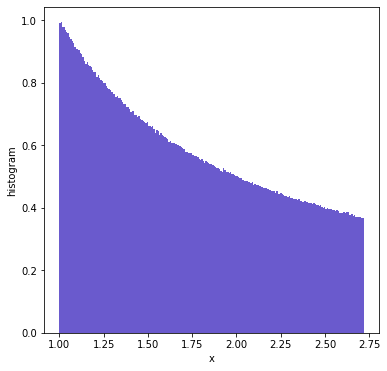

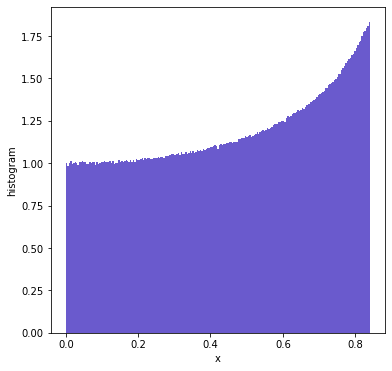

In [ ]:
x = np.random.uniform(size = nr) 
xexp = np.exp(x)
plot_hist(xexp)

xsin = np.sin(x)
plot_hist(xsin)
# etc...

## <font color='darkblue'>"Shape" of NumPy arrays</font>

The list of dimensions of an array is called "shape" in NumPy jargon. 

Dimensions themselves are called "axes" in NumPy. So dimension 0 is axis 0. 


So a 1D array with 5 elements has shape of <tt>(5)</tt>, 2D array with 4 rows and 3 columns has shape of <tt>(4,3)</tt>, etc. 

In [ ]:
arr = np.array([1, 2.0, 3, 4, 5])

# there are two alternative ways to get array shape
print(arr.shape, np.shape(arr))

# a 2D array with 4 rows and 3 columns
arr = np.array([[0,0,0], [1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr.shape, np.shape(arr))

(5,) (5,)
(4, 3) (4, 3)


We can re-arrange elements of an array into a different "shape". For example, I can rearrange a 1D array of 9 elements into a 2D array of 3 rows and 3 columns (still 9 elements total, as the number of elements must be preserved in reshaping!). 

In [ ]:
a = np.array([1,'2',3,4,5])
b = a
b[3] = 'four'
print(a)

['1' '2' '3' 'four' '5']


In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(arr.shape)
print(arr)

arr = arr.reshape((3,3))

print(arr.shape)
print(arr)

(9,)
[1 2 3 4 5 6 7 8 9]
(3, 3)
[[1 2 3]
 [4 5 6]
 [7 8 9]]


If I am trying to reshape an array into "shape" with different number of elements, an error will be generated. 

In [ ]:
# this is an array of 10 elements
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# so I cannot reshape it into an array with 9 elements
arr = arr.reshape((3,3))

ValueError: cannot reshape array of size 10 into shape (3,3)

### <font color='darkblue'>"Flattening" NumPy arrays</font>

We can turn a multi-dimensional NumPy array into 1-dimensional one ("flatten" it) using method <tt>flatten</tt>

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(arr.shape)
print(arr)

arr = arr.reshape((3,3))
print(arr.shape)

arr = arr.flatten()
print(arr.shape)

(9,)
[1 2 3 4 5 6 7 8 9]
(3, 3)
(9,)


Flattening is useful because sometimes it's convenient to work with a multi-dimensional array, but sometimes we just want to plot or histogram all numbers in such array and this may need to be converted into 1-d array. 

### <font color='darkblue'>Generating ns sums of nr uniform numbers with NumPy capabilities (no loops involved)</font>

This is what you did in ex 1 of hw 3. 

In [ ]:
# generate ns*nr uniformly distributed random numbers 
# and put them into 2d NumPy array of dimensions ns by nr using reshape method
nr = 10
ns = 10000000
xd = np.random.uniform(size = ns * nr).reshape((nr, ns)) - 0.5 # subtract the mean to shift interval to [-0.5, 0.5]

# axis keyword instructs np.sum method to operate on a particular dimension of array and record result in the other dimension
xs = np.sum(xd, axis = 0) / nr # compute each successive nr numbers and will generate new 1d array of ns sums

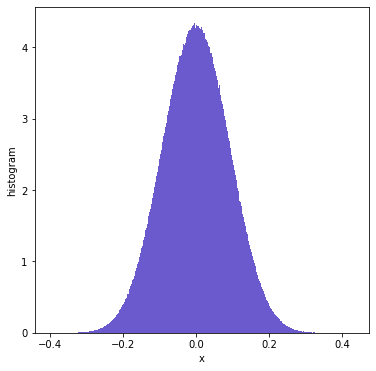

In [ ]:
plot_hist(xs)

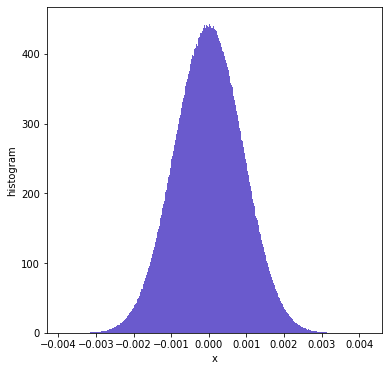

In [ ]:
# the same for sine of the uniformly distributed numbers
xs = np.sum(np.sin(xd), axis = 0) / nr # compute each successive nr numbers and will generate new 1d array of ns sums

plot_hist(xs)

### <font color='darkblue'>More on "vector" operations with NumPy arrays</font>

In [ ]:
import numpy as np 

a = [1, 2, 3, 4, 5] # this is a list
b = [6, 7, 8, 9, 10] # another list

# we cannot do c = a + b with lists, we need to sum list elements in a loop
# or using a list comprehension
c = []
for i in range(len(a)):
    c.append(a[i] + b[i])
    
    
# however, if we convert a and b into numpy arrays
a = [1, 2, 3, 4, 5]
b = [6, 7, 8, 9, 10]
a, b = np.array(a), np.array(b)
# we can just sum the arrays or do other operations
print(a+b, a*b, a/b, b**2)

[ 7  9 11 13 15] [ 6 14 24 36 50] [0.16666667 0.28571429 0.375      0.44444444 0.5       ] [ 36  49  64  81 100]


### <font color='darkblue'>Mean, median, variance, percentile</font>

NumPy has functions for computing mean, median, variance, and standard deviation for a a sequence of numbers in a numpy array. 

In [ ]:
xr = np.random.uniform(size = nr)# subtract the mean to shift interval to [-0.5, 0.5]

xmean = np.mean(xr) # sample mean
xmed  = np.median(xr) # sample median
xvar  = np.var(xr, ddof=1) # computes variance as sum((x-mean)**2)/(n-ddof), default is ddof=0
xstd  = np.sqrt(xvar) # sample st deviation
xstd2 = np.std(xr, ddof=1) # sample st deviation can also be computed this way
print(xmean, xmed, xvar, xstd, xstd2)

0.6210101909778407 0.6565100298957744 0.0798870822096422 0.28264302964984334 0.28264302964984334


### <font color='darkblue'>Filtering operations for a NumPy array</font>

NumPy arrays allow a unique (this cannot be done for lists or strings) and extremely useful capability: filtering operations. Filtering operations allow us to select elements of a NumPy array that satisfy a condition we specify. 

For example, below <tt>nr</tt> uniformly distributed random numbers are generated and then only those with values >=0.5 are selected for computing the mean


In [ ]:
nr = 1000
xr = np.random.uniform(size=nr)
print(np.mean(xr))

# filter
fx = xr > 0.5
# fx is an array of the same shape as xr with boolean elements True, if condition is satisfied and False otherwise
print(fx[:10]) 

# we can use this filter to say compute mean of numbers > 0.5 in the sequence
print(np.mean(xr[fx]))

0.4954843338776304
[False  True False False False  True  True False  True False]
0.750714192050289


In [ ]:
# we can also do this directly without assignment

print(np.mean(xr[xr>0.5]))

0.750714192050289


more examples... Note that we have to use bitwise logical operations (see [here](https://www.w3schools.com/python/python_operators.asp) if you need a refresher) instead of <tt>and</tt>, <tt>or</tt> etc

It is also possible to do such conditions using [np.logical functions](https://www.pythonprogramming.in/5-examples-to-filter-a-numpy-array-based-on-two-conditions-in-python.html)

In [ ]:
# mean of the elements in the range [0.1,0.4]
print(np.mean(xr[(xr>=0.1) & (xr<=0.4)]))

0.2549273551023934


### <font color='darkblue'>Adding and inserting items to a NumPy array</font>

Often we have the need to add items to an array, just like we need to append items to a list. 

In NumPy, we can append using method [<tt>np.append</tt>](https://numpy.org/doc/stable/reference/generated/numpy.append.html).

In [ ]:
arr = np.array(list(range(10)))
print(arr)
arr = np.append(arr, list(range(10,15)))
print(arr)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


We can also insert items at a given location/axis of the NumPy array with method [<tt>np.insert</tt>](https://numpy.org/doc/stable/reference/generated/numpy.insert.html). 

In [ ]:
arr = np.array([1, 2, 3, 6, 7, 8, 9])
print(arr)
arr = np.insert(arr, 3, [4, 5])
print(arr)

[1 2 3 6 7 8 9]
[1 2 3 4 5 6 7 8 9]


For multi-dimensional array NumPy has methods [<tt>np.hstack</tt>](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html) and [<tt>np.vstack</tt>](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) for joing arrays column- and row-wise, and other methods such as [<tt>np.stack</tt>](https://numpy.org/doc/stable/reference/generated/numpy.stack.html#numpy.stack), [<tt>np.concatenate</tt>](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html#numpy.concatenate).